### Q05
YEJUN

In [ ]:
#1. 조건

# 정수형 데이터 1,000,000개로 구성된 리스트가 주어진다.

#각 정수는 1 이상 1,000,000 이하의 값이다.
import numpy as np
import time
ar1= np.random.randint(1, 1000000, 1000000)

#해당 리스트를 제한 시간 3초 이내에 정렬해야 한다.
time_start = time.time()
time_end = time.time()
#정렬이 완료된 리스트의 앞 10개 항목을 출력해야 한다.
ar_sorted = sorted(ar1)
#정렬 정확성, 실행 시간, 출력값을 동시에 검사하여 조건을 만족하면 "TRUE", 하나라도 어기면 "FALSE"를 출력한다.
if ar_sorted == sorted(ar1) and time_start - time_end < 3:
    print(ar_sorted[:10])
    print(f'time_taken: {round(time_end -time_start, 4)}')
    print("PASSCORD : TRUE")
else:
    print(ar_sorted[:10])
    print(f'time_taken: {round(time_end -time_start, 4)}')
    print("PASSCORD : FALSE")

import pandas as pd
ar1 = pd.DataFrame(ar_sorted)
ar1.T.to_csv('Question5.csv', index=False, header=False)

[1, 2, 3, 4, 4, 4, 6, 8, 9, 10]
time_taken: 0.0
PASSCORD : TRUE


In [ ]:
import pandas as pd
ar1 = pd.DataFrame(ar_sorted)
ar1.T.to_csv('Question5.csv', index=False, header=False)

In [ ]:
#2. 제약 조건

#sorted() 또는 .sort() 등 파이썬 내장 정렬 함수만 사용 가능하다.

#정렬 알고리즘을 직접 구현하는 것은 금지된다.

#정렬 외에 리스트를 임의로 조작하는 shuffle() 등의 함수 사용은 금지된다.

#시스템 입출력 함수(예: input(), sys.stdin.readline() 등) 사용은 금지된다.

#리스트는 코드 내부에서 직접 생성해야 한다.

#단일 스레드 기준으로 실행되며, CPU 병렬 처리는 고려하지 않는다.

#실행 시간은 time 모듈을 활용해 측정한다.

In [ ]:
#3. 출력

#정렬된 리스트의 앞 10개 값을 리스트 형태로 출력한다.

#실행시간 : 2.XXXX 형식으로 소요 시간을 출력한다.

#조건을 만족하면 "TRUE", 아니면 "FALSE"를 출력한다.

Merge sort

In [164]:
def merge_sort(arr):
    if len(arr)<=1:
        return arr
    
    mid = len(arr)//2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result =[]
    i = j = 0
    while i< len(left) and j < len(right):
        if left[i] >= right[j]:
            result.append(left[i])
            i += 1
        elif left[i] < right[j]:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

#reverse 시 그냥 < > 부호만 바꿔주면 될듯

Quick_sort

In [ ]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    left = [x for x in arr if x < pivot]
    mid = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + mid + quick_sort(right)
# 중복값 제거하고 싶으면 mid 대신 [pivot] 만 넣기
#quick_sort(ar1)

In [ ]:
def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i -1
        while j >=0 and arr[j]>key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr 


#insertion_sort(ar1)

Timsort

Sorted 내장함수에서는 Timsort 알고리즘으로 구현

In [167]:
import matplotlib.pyplot as plt
import timeit
def cal_time(f, x: list, n: int):
    algo = f.__name__
    t = timeit.timeit(lambda: f(x), number=n)
    print(f'time taken for {n} reps for {algo}: {round(t, 3)}')
    return round(t, 3)

ar1 = np.random.randint(10, size= 10000)
n = 10000000

In [ ]:
algo_list = [quick_sort, merge_sort, sorted]
n_list = [10**x for x in [1,2,3,4]]

results = {}
for algo in algo_list:
    algo_n= algo.__name__
    results[algo_n] = []
    print(algo_n)
    for n in n_list:
        print(n)
        results[algo_n].append(cal_time(algo, ar1, n))

quick_sort
10
time taken for 10 reps for quick_sort: 0.03
100
time taken for 100 reps for quick_sort: 0.298
1000
time taken for 1000 reps for quick_sort: 2.48
10000
time taken for 10000 reps for quick_sort: 23.575
merge_sort
10
time taken for 10 reps for merge_sort: 0.18
100
time taken for 100 reps for merge_sort: 1.797
1000
time taken for 1000 reps for merge_sort: 17.942
10000
time taken for 10000 reps for merge_sort: 177.265
sorted
10
time taken for 10 reps for sorted: 0.009
100
time taken for 100 reps for sorted: 0.085
1000
time taken for 1000 reps for sorted: 0.846
10000
time taken for 10000 reps for sorted: 8.475


In [ ]:
import pandas as pd
results_df = pd.DataFrame(results, index = n_list)
results_df

,quick_sort,merge_sort,sorted
10,0.030,0.180,0.009
100,0.298,1.797,0.085
1000,2.480,17.942,0.846
10000,23.575,177.265,8.475


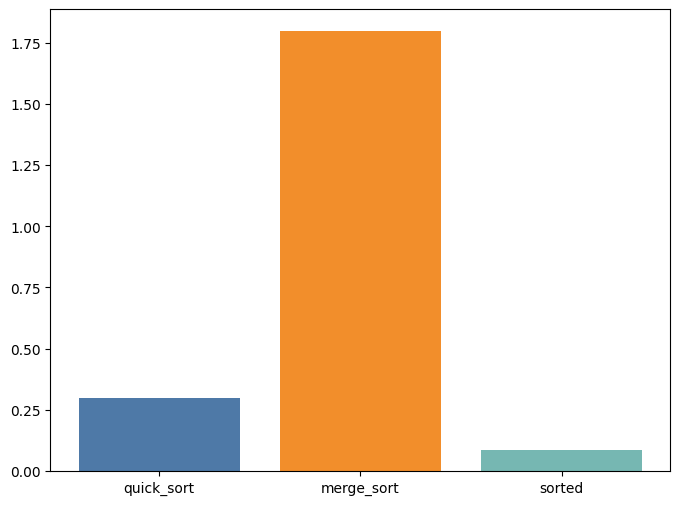

In [170]:
#특정 시점만 시각화
row = results_df.loc[100]

plt.figure(figsize=(8, 6))
bars = plt.bar(row.index, row.values, color=['#4e79a7', '#f28e2b', '#76b7b2'])


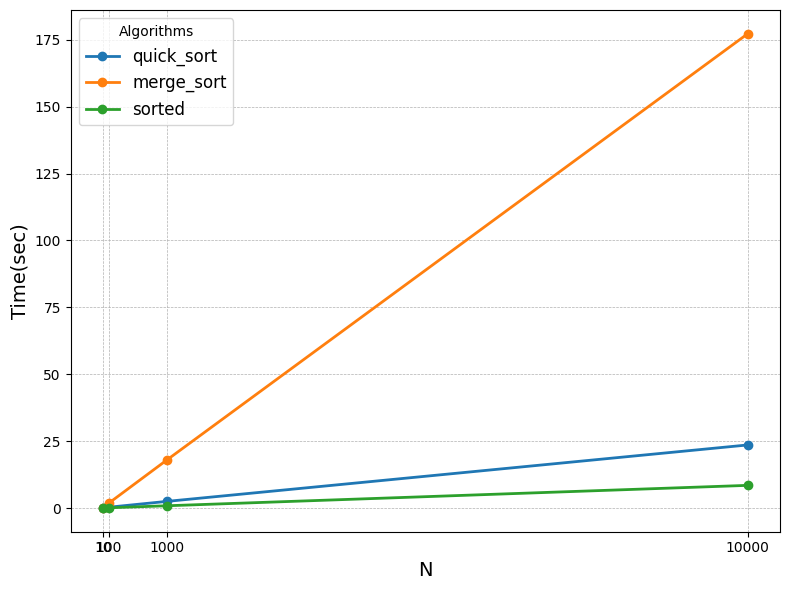

In [ ]:
# 시각화 : gpt prompt 사용. 
# 이 함수를 통해 나온 출력을 df로 저장했어 index는 n, column은 sort algorithm이야. 이걸 시각화하는 코드를 작성해줘.
plt.figure(figsize=(8, 6))
for algo in algo_list:
    algo_n = algo.__name__
    plt.plot(results_df.index, results_df[algo_n], label=algo_n, marker='o', markersize=6, linewidth=2)

plt.xlabel('N', fontsize=14)
plt.ylabel('Time(sec)', fontsize=14)
plt.legend(title='Algorithms', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xticks(n_list, [str(n) for n in n_list])

plt.tight_layout()
plt.show()

In [173]:
#import sys
#nums = list(map(int, sys.stdin.readline().strip().split()))